In [1]:
import numpy as np
from scipy.linalg import cho_solve, cho_factor
import matplotlib.pyplot as plt
import matplotlib
cmap = 'bwr'

from PIL import Image

## load data

In [2]:
import os
import pandas as pd
import re

file_path = "./data/USANS/32871/"
sample_files = [f for f in os.listdir(file_path) if 'sample' in f.lower()]
labels = ["unscaled", "lb", "lbs"]
filtered_files = [f for f in sample_files if labels[0] in f]
# Prepare lists to store extracted info
measure_times = []
samples = []

for fname in filtered_files:
    # Extract measure time (e.g., 1e4, 3e5, etc.)
    match_time = re.search(r'_(\d+e\d+)_', fname)
    measure_times.append(match_time.group(1) if match_time else None)
    # Extract samples (e.g., Sample1, Sample2, etc.)
    match_samples = re.search(r'(Sample\d+)', fname, re.IGNORECASE)
    samples.append(match_samples.group(1) if match_samples else None)

# Create DataFrame
df_info = pd.DataFrame({
    'filename': filtered_files,
    'measure_time': measure_times,
    'samples': samples
})

# Normalize sample names to lowercase for merging
df_info['samples'] = df_info['samples'].str.lower()
df_info['measure_time'] = df_info['measure_time'].fillna('undefined')
df_pivot = df_info.pivot_table(index='samples', columns='measure_time', values='filename', aggfunc='first')

# Sort columns by measurement time, keeping 'undefined' first
def time_key(x):
    if x == 'undefined':
        return -float('inf')
    try:
        return float(x.replace('e', 'E'))
    except:
        return float('inf')

sorted_columns = sorted(df_pivot.columns, key=time_key)
df_pivot = df_pivot.reindex(columns=sorted_columns)

display(df_pivot)

measure_time,undefined,1e4,3e4,1e5,3e5,3e6
samples,,,,,,
sample1,UN_Sample1_det_1_unscaled.txt,UN_Sample1_1e4_det_1_unscaled.txt,UN_Sample1_3e4_det_1_unscaled.txt,UN_Sample1_1e5_det_1_unscaled.txt,UN_Sample1_3e5_det_1_unscaled.txt,NaN
sample2,UN_Sample2_det_1_unscaled.txt,UN_Sample2_1e4_det_1_unscaled.txt,UN_Sample2_3e4_det_1_unscaled.txt,UN_Sample2_1e5_det_1_unscaled.txt,UN_Sample2_3e5_det_1_unscaled.txt,NaN
sample3,UN_Sample3_det_1_unscaled.txt,UN_Sample3_1e4_det_1_unscaled.txt,UN_Sample3_3e4_det_1_unscaled.txt,UN_Sample3_1e5_det_1_unscaled.txt,UN_sample3_3e5_det_1_unscaled.txt,UN_Sample3_3e6_det_1_unscaled.txt
sample4,UN_Sample4_det_1_unscaled.txt,UN_Sample4_1e4_det_1_unscaled.txt,UN_Sample4_3e4_det_1_unscaled.txt,UN_Sample4_1e5_det_1_unscaled.txt,UN_Sample4_3e5_det_1_unscaled.txt,UN_Sample4_3e6_det_1_unscaled.txt
sample5,UN_Sample5_det_1_unscaled.txt,UN_Sample5_1e4_det_1_unscaled.txt,UN_Sample5_3e4_det_1_unscaled.txt,UN_Sample5_1e5_det_1_unscaled.txt,UN_Sample5_3e5_det_1_unscaled.txt,NaN
sample6,UN_Sample6_det_1_unscaled.txt,UN_Sample6_1e4_det_1_unscaled.txt,UN_Sample6_3e4_det_1_unscaled.txt,NaN,UN_Sample6_3e5_det_1_unscaled.txt,NaN
sample7,UN_Sample7_det_1_unscaled.txt,UN_Sample7_1e4_det_1_unscaled.txt,UN_Sample7_3e4_det_1_unscaled.txt,UN_Sample7_1e5_det_1_unscaled.txt,UN_Sample7_3e5_det_1_unscaled.txt,NaN
sample8,UN_Sample8_det_1_unscaled.txt,UN_Sample8_1e4_det_1_unscaled.txt,UN_Sample8_3e4_det_1_unscaled.txt,UN_Sample8_1e5_det_1_unscaled.txt,UN_Sample8_3e5_det_1_unscaled.txt,NaN
sample9,UN_Sample9_det_1_unscaled.txt,UN_Sample9_1e4_det_1_unscaled.txt,UN_Sample9_3e4_det_1_unscaled.txt,UN_Sample9_1e5_det_1_unscaled.txt,UN_sample9_3e5_det_1_unscaled.txt,NaN


In [3]:
sample3_files = df_info[df_info['samples'].str.lower() == 'sample3']['filename']
sample3_data_list = [
    np.loadtxt(os.path.join(file_path, fname), skiprows=0, delimiter=',', usecols=(0,1,2))
    for fname in sample3_files
]

sample3_time_list = []
for fname in sample3_files:
    match = re.search(r'_(\d+e\d+)_', fname)
    if match:
        sample3_time_list.append(float(match.group(1)))
    else:
        sample3_time_list.append(np.nan)
        
# Combine times and data, sort by time, then unpack
sorted_items = sorted(zip(sample3_time_list, sample3_data_list), key=lambda x: (np.isnan(x[0]), x[0]))
sample3_time_list_sorted, sample3_data_list_sorted = zip(*sorted_items)

# Convert back to list
sample3_time_list = list(sample3_time_list_sorted)
sample3_data_list = list(sample3_data_list_sorted)

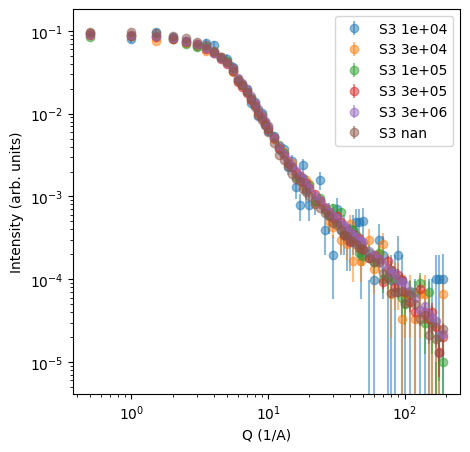

In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

for i, data in enumerate(sample3_data_list):
    Q = data[:, 0]
    I = data[:, 1]
    dI = data[:, 2]
    ax.errorbar(Q, I, yerr=dI, fmt='o', label=f'S3 {sample3_time_list[i]:.0e}', alpha=0.5)
ax.set_xlabel('Q (1/A)')
ax.set_ylabel('Intensity (arb. units)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
